In [1]:
import pandas as pd
df=pd.read_csv("titanic_data_set.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.shape

(891, 12)

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.describe(include= ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
survived=df[df['Survived'] == 1]
not_survived= df[df['Survived'] == 0]
print 'Survived'
print survived.head()
print 'Not Survived'
print not_survived.head()

Survived
   PassengerId  Survived  Pclass  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN     

In [7]:
print "Survived: %i (%f%%)" % (len(survived), float(len(survived))/len(df)*100.0)
print "Not survived: %i (%f%%)" % (len(not_survived), float(len(not_survived))/len(df)*100.0)
print "Total : %i" % len(df)

Survived: 342 (38.383838%)
Not survived: 549 (61.616162%)
Total : 891


In [8]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

## Relationship between PassengerClass and Survival

In [9]:
df.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

## Relationship between Sex and Survival

In [10]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
df.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
dtype: int64

## Relationship between Age and Survival

In [12]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
30.00    25
28.00    25
19.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
23.00    15
34.00    15
33.00    15
20.00    15
39.00    14
17.00    13
40.00    13
42.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
28.50     2
40.50     2
63.00     2
13.00     2
10.00     2
45.50     2
70.00     2
30.50     2
71.00     2
59.00     2
57.00     2
55.00     2
0.75      2
64.00     2
23.50     1
14.50     1
0.67      1
53.00     1
0.92      1
0.42      1
70.50     1
36.50     1
80.00     1
66.00     1
74.00     1
12.00     1
55.50     1
34.50     1
24.50     1
20.50     1
Name: Age, dtype: int64

In [13]:
df.groupby('Age').Survived.value_counts()

Age    Survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
1.00   1           5
       0           2
2.00   0           7
       1           3
3.00   1           5
       0           1
4.00   1           7
       0           3
5.00   1           4
6.00   1           2
       0           1
7.00   0           2
       1           1
8.00   0           2
       1           2
9.00   0           6
       1           2
10.00  0           2
11.00  0           3
       1           1
12.00  1           1
13.00  1           2
14.00  0           3
       1           3
14.50  0           1
                  ..
51.00  0           5
       1           2
52.00  0           3
       1           3
53.00  1           1
54.00  0           5
       1           3
55.00  0           1
       1           1
55.50  0           1
56.00  0           2
       1           2
57.00  0           2
58.00  1           3
       0           2
59.00  0          

## Relationship Between Fare and Survival

In [14]:
df.Fare.value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
7.2292      15
26.5500     15
0.0000      15
8.6625      13
7.8542      13
7.2500      13
7.2250      12
9.5000       9
16.1000      9
15.5000      8
24.1500      8
14.5000      7
7.0500       7
56.4958      7
52.0000      7
69.5500      7
31.2750      7
14.4542      7
27.9000      6
7.7958       6
30.0000      6
26.2500      6
            ..
6.9500       1
15.0500      1
21.6792      1
7.1417       1
15.0458      1
4.0125       1
12.0000      1
8.4583       1
7.7875       1
14.0000      1
15.0000      1
9.8417       1
12.2750      1
12.2875      1
22.5250      1
6.4500       1
15.5500      1
8.5167       1
63.3583      1
6.8583       1
22.0250      1
13.7917      1
221.7792     1
12.6500      1
8.8500       1
61.1750      1
10.1708      1
76.2917      1
15.1000      1
81.8583      1
Name: Fare, dtype: int64

In [15]:
df.groupby('Fare').Survived.value_counts()

Fare      Survived
0.0000    0           14
          1            1
4.0125    0            1
5.0000    0            1
6.2375    0            1
6.4375    0            1
6.4500    0            1
6.4958    0            2
6.7500    0            2
6.8583    0            1
6.9500    0            1
6.9750    0            1
          1            1
7.0458    0            1
7.0500    0            7
7.0542    0            2
7.1250    0            4
7.1417    1            1
7.2250    0            9
          1            3
7.2292    0           11
          1            4
7.2500    0           12
          1            1
7.3125    0            1
7.4958    0            2
          1            1
7.5208    0            1
7.5500    0            3
          1            1
                      ..
106.4250  0            1
          1            1
108.9000  0            1
          1            1
110.8833  1            3
          0            1
113.2750  1            2
          0            1
120.00

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Bar graph between Pclass and Survived

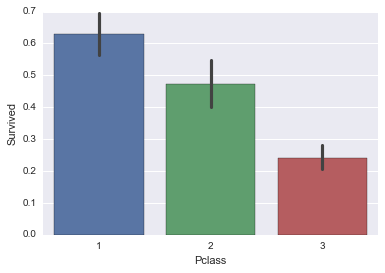

In [17]:
sns.barplot (x='Pclass', y='Survived', data=df)

## Bar Grapg Between Sex and survived

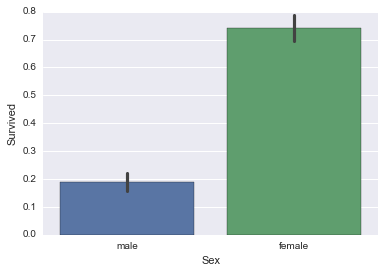

In [18]:
sns.barplot (x='Sex', y='Survived', data=df)

## Violin plot of Pclass & Age vs Survival

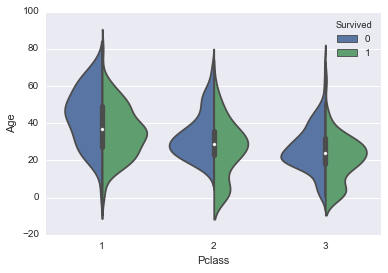

In [19]:
sns.violinplot (x='Pclass', y='Age', hue='Survived', data=df, split=True)

## Violin plot of Sex & Age vs Survival

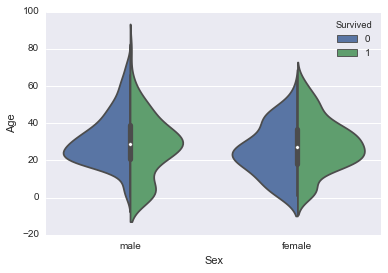

In [20]:
sns.violinplot (x='Sex', y='Age', hue='Survived', data=df, split=True)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Replacing missing values with mean of the feature for age

In [23]:
from sklearn.preprocessing import Imputer
age_imputer = Imputer (missing_values = 'NaN', strategy = 'mean', axis = 0)
age_imputer = age_imputer.fit(df.iloc[:, [5]])
df.iloc[: , [5]] = age_imputer.transform (df.iloc[:, [5]])
print df.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [24]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Replacing the missing values with class with maximum frequency for embarked

In [25]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
df['Embarked'] = df['Embarked'].fillna('S')

In [27]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## Labelencoder label to encode the data for features like Sex & Embarked

In [29]:
from sklearn.preprocessing import LabelEncoder
labelencoder_sex = LabelEncoder()
df.iloc[: , [4]] = labelencoder_sex.fit_transform(df.iloc[: ,[4]])
print df.head()                                                   

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


C:\Users\win\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
labelencoder_embarked = LabelEncoder()
df.iloc[: , [11]] = labelencoder_embarked.fit_transform(df.iloc[: , [11]])
print df.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin  Embarked  
0         A/5 21171   7.2500   NaN         2  
1          PC 17599  71.2833   C85         0  
2  STON/O2. 3101282   7.9250   NaN         2  
3            113803  53.1000  C123         2  
4            373450   8.0500   NaN         2  


C:\Users\win\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Encoding multiclass features i.e. Embarked

In [31]:
df = pd.get_dummies (df , columns=['Pclass', 'Embarked'])
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0,0.0,0.0,1.0,0.0,0.0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0.0,1.0,0.0,0.0,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1.0,0.0,0.0,0.0,0.0,1.0
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0,0.0,1.0,0.0,0.0,1.0


## Creating new feature FamilySize by combining SibSp and Parch

In [32]:
df['FamilySize'] = df['SibSp'] + df['Parch']+1
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,FamilySize
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0.0,1.0,0.0,0.0,1.0,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0,0.0,0.0,1.0,0.0,0.0,2
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1.0,0.0,0.0,0.0,0.0,1.0,2
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1


## Droping irrelevant features and exporting dataframe to a new csv file

In [33]:
irrelevant_features=['PassengerId','Name','SibSp','Parch', 'Ticket', 'Cabin']
df=df.drop(irrelevant_features, axis=1)
df.head()

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,FamilySize
0,0,1,22.0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,2
1,1,0,38.0,71.2833,1.0,0.0,0.0,1.0,0.0,0.0,2
2,1,0,26.0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0,1
3,1,0,35.0,53.1000,1.0,0.0,0.0,0.0,0.0,1.0,2
4,0,1,35.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,1


In [34]:
df.to_csv('titanic_prepared_data.csv', index=0)